In [1]:
from MultiSS_SpectrumConfig import SpectrumConfig, DataImportConfig
from MultiSS_SpectrumCalculaotr import SpectrumCalculator
from MultiSS_CrossConfig import CrossConfig
from MultiSS_PlotConfig import PlotConfig
from MultiSS_SpectrumPlotter import SpectrumPlotter

import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = int(1e6)
data1 = np.sin(np.linspace(0, 50000*np.pi, N)) + 3
data2 = np.cos(np.linspace(0, 50000*np.pi, N)) + 3
data3 = np.random.rand(N)

config1 = DataImportConfig(data=data1)
config2 = DataImportConfig(data=data2)
config3 = DataImportConfig(data=data3)

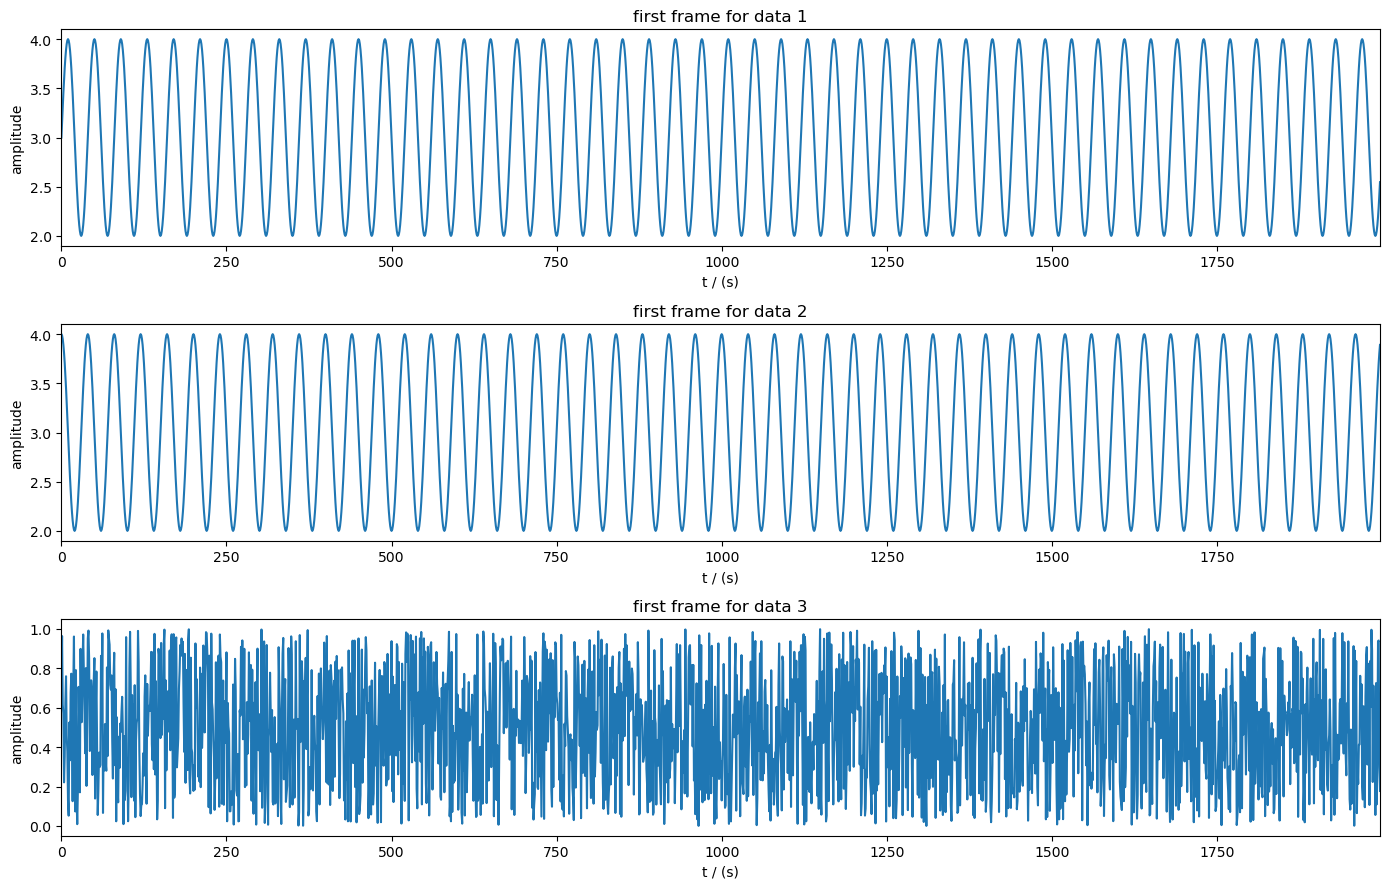

  0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
sconfig = SpectrumConfig(dt=1, f_unit='Hz', backend='cpu', order_in=[1, 2], spectrum_size=1000, show_first_frame=True)
selected_data = [0, 1, 2]
cconfig = CrossConfig(cross_corr_2=[(1, 0), (0, 1), (2, 1)])
scalc = SpectrumCalculator(sconfig, cconfig, [config1, config2, config3], selected=selected_data)
scalc.calc_spec();

+---------------+---------------------+------------------------+
| Dataset Index |         S1          |        Error S1        |
+---------------+---------------------+------------------------+
|      0.0      | 2.9999999965934756  |          0.0           |
|      1.0      |  3.000000043283973  | 2.8190934244776145e-05 |
|      2.0      | 0.49966300906539174 | 0.00011757962784031406 |
+---------------+---------------------+------------------------+


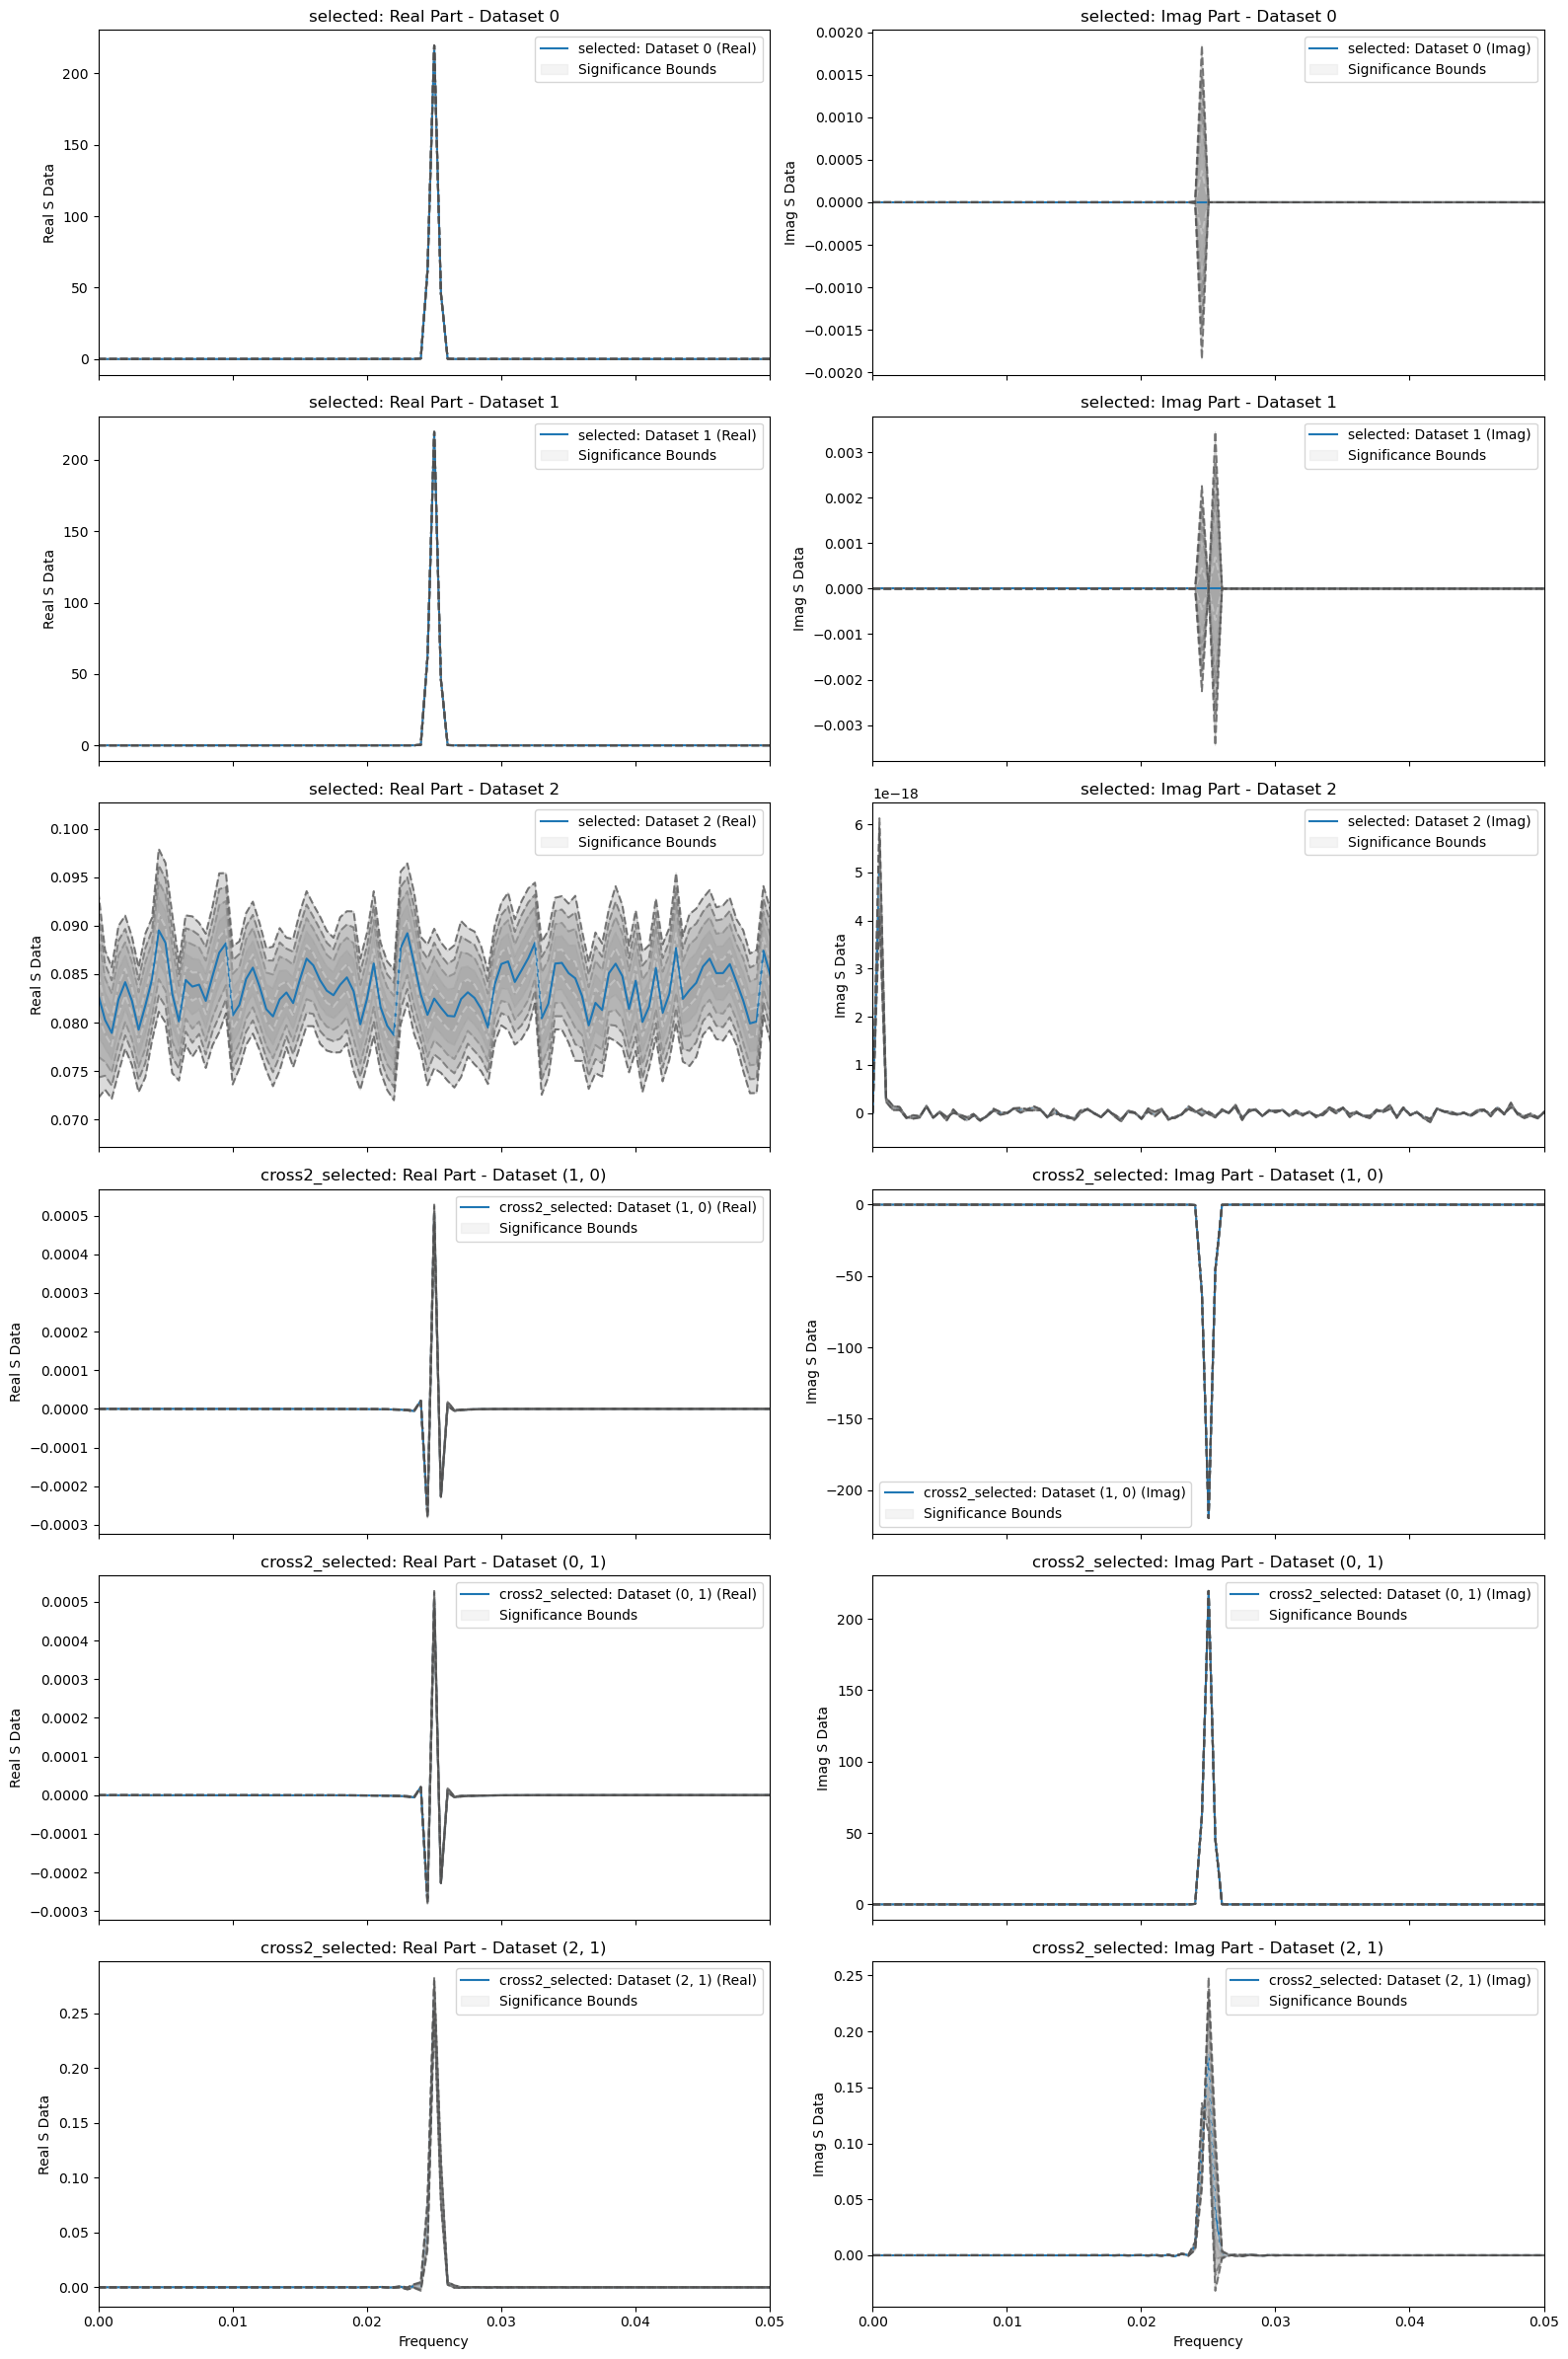


S2 Scaling Information:
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|     False      |     N/A      |
+----------------+--------------+


In [7]:
pconfig = PlotConfig(f_min=0, f_max=0.05, display_orders=None, significance=5, arcsinh_scale=(False, 0.02), plot_format=['re', 'im'])
plotter = SpectrumPlotter(sconfig, cconfig, scalc, pconfig)
plotter.display()

+---------------+---------------------+------------------------+
| Dataset Index |         S1          |        Error S1        |
+---------------+---------------------+------------------------+
|      0.0      | 2.9999999965934756  |          0.0           |
|      1.0      |  3.000000043283973  | 2.8190934244776145e-05 |
|      2.0      | 0.49966300906539174 | 0.00011757962784031406 |
+---------------+---------------------+------------------------+


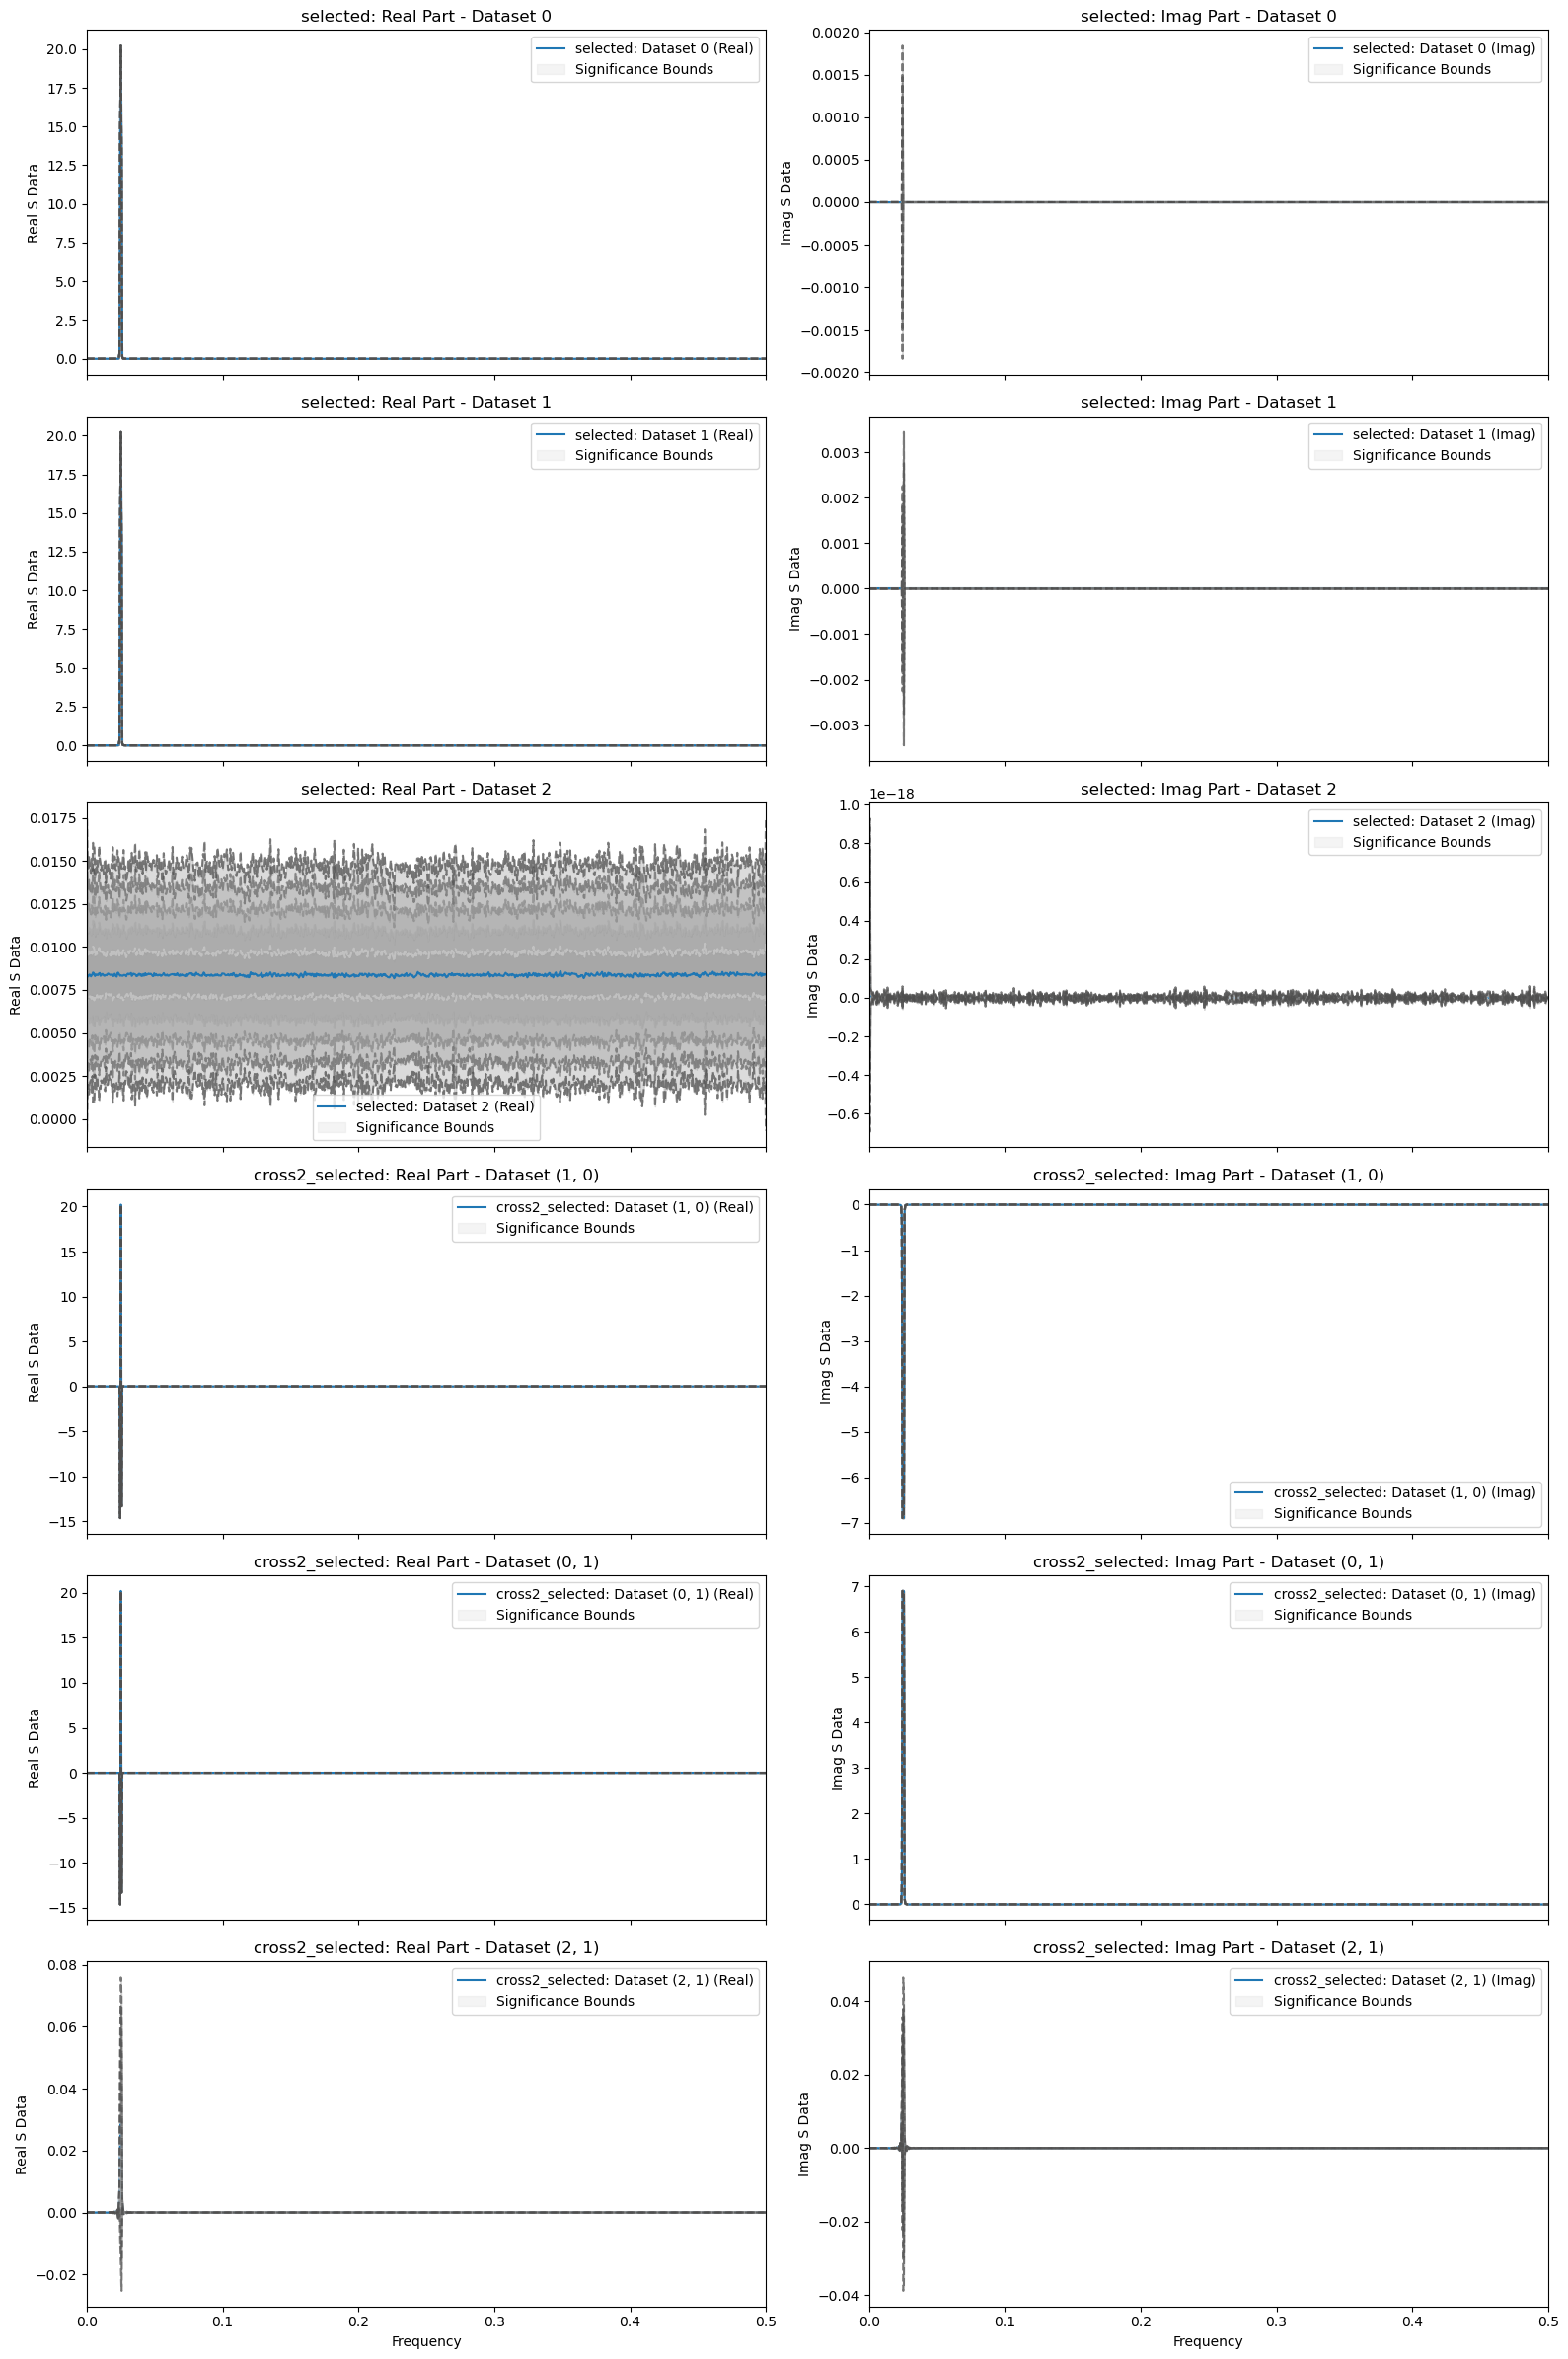


S2 Scaling Information:
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+


In [9]:
pconfig = PlotConfig(f_min=0, f_max=0.5, display_orders=None, significance=5, arcsinh_scale=(True, 0.02), plot_format=['re', 'im'])
plotter = SpectrumPlotter(sconfig, cconfig, scalc, pconfig)
plotter.display()